# BART for Text Classification
* Binary and multi-class classification

## Requirements


In [ ]:
import pandas as pd
from transformers import pipeline
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, f1_score, recall_score, precision_score, ConfusionMatrixDisplay
import seaborn as sns

## Loading Model BART with pipeline for  zero-shot-classification

In [ ]:
classifier_bart = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## Loading Data


### Loading Edus Data for Appraisal Binary Classification

In [ ]:
edus_dataset = pd.read_excel('Edus+Annotations Data.xlsx')
edus_dataset

,Annotated Text,Label,Anno_name_x,matches,Edu Speech,Anno_name_y,Appraisal?
0,wishes to express its satisfaction,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,Uruguay wishes to express its satisfaction for...,Uruguay wishes to express its satisfaction for...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
1,NaN,NaN,NaN,None,(2016).,UNSC_2016_SPV.7643_spch018_ann_Uruguay,no
2,we want to thank,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,"At the outset, we want to thank the United Sta...","At the outset, we want to thank the United Sta...",UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
3,is very pleased,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,Uruguay is very pleased to join the rest of th...,Uruguay is very pleased to join the rest of th...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
4,problem,appreciation-negative,UNSC_2016_SPV.7643_spch018_ann_Uruguay,that dealing with this problem can no longer b...,that dealing with this problem can no longer b...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
...,...,...,...,...,...,...,...
6445,NaN,NaN,NaN,None,Let us ensure,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,no
6446,criminal decree,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,that are currently enshrined in the criminal d...,that are currently enshrined in the criminal d...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes
6447,NaN,NaN,NaN,None,and let us stop that decree from being impleme...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,no
6448,extremely significant consequences,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,That would have extremely significant conseque...,That would have extremely significant conseque...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes


In [ ]:
# Extracting gold labels from Edus dataset
gold_lables_appraisal= []
for i in range(edus_dataset.shape[0]):
  gold_lables_appraisal.append(edus_dataset.iloc[i]["Appraisal?"])

In [ ]:
# Getting examples to classify from dataset
# Size of dataset (rows)
size_edus_dataset = edus_dataset.shape[0]

edus_appraisal = [] #- list for examples to classify

# Extracting all text examples to classify from dataset
for i in range(size_edus_dataset):
  edus_appraisal.append(edus_dataset.iloc[i]["Edu Speech"])

In [ ]:
appraisal_labels = ['yes', 'no']

### Loading Data for Multi-Class Classification Attitude labels

In [ ]:
attitude_data = pd.read_excel('Edus+Annotations Only Yes Appraisal Data.xlsx') # CHange to correct dataset
attitude_data

,Annotated Text,Label,Anno_name_x,matches,Edu Speech,Anno_name_y,Appraisal?
0,wishes to express its satisfaction,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,Uruguay wishes to express its satisfaction for...,Uruguay wishes to express its satisfaction for...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
1,we want to thank,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,"At the outset, we want to thank the United Sta...","At the outset, we want to thank the United Sta...",UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
2,is very pleased,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,Uruguay is very pleased to join the rest of th...,Uruguay is very pleased to join the rest of th...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
3,problem,appreciation-negative,UNSC_2016_SPV.7643_spch018_ann_Uruguay,that dealing with this problem can no longer b...,that dealing with this problem can no longer b...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
4,voted in favour,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,"For all of those reasons, therefore, Uruguay v...","For all of those reasons, therefore, Uruguay v...",UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
...,...,...,...,...,...,...,...
2738,crisis,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,and show the way towards a political solution ...,and show the way towards a political solution ...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes
2739,crisis,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,and show the way towards a political solution ...,and show the way towards a political solution ...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes
2740,criminal decree,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,that are currently enshrined in the criminal d...,that are currently enshrined in the criminal d...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes
2741,extremely significant consequences,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,That would have extremely significant conseque...,That would have extremely significant conseque...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes


In [ ]:
# Extracting gold labels from data-subset of 10 speeches
gold_lables_attitude= []
for i in range(attitude_data.shape[0]):
  gold_lables_attitude.append(attitude_data.iloc[i]["Label"])

In [ ]:
# Getting examples to classify from dataset
# Size of dataset (rows)
size_dataset_att = attitude_data.shape[0]

edus_attitude = [] #- list for examples to classify

# Extracting all text examples to classify from dataset
for i in range(size_dataset_att):
  edus_attitude.append(attitude_data.iloc[i]["Edu Speech"])

## Labels Prediction

In [ ]:
# Labels for Attitude Multiclass Classification
attitude_labels = ['affect-positive', 'affect-negative', 'appreciation-positive', 'appreciation-negative', 'judgement-positive', 'judgement-negative']

# Template for label prediction
template_de = 'The category is {}'

### Predicting binary labels for Appraisal (yes/no)

In [ ]:
predicted_appraisal = []

for txt in edus_appraisal:
    prediction_appraisal = classifier_bart(txt, appraisal_labels, hypothesis_template=template_de)
    #print(f'\nZero-shot prediction for: \n {prediction["sequence"]}')
    top_1 = zip(prediction_appraisal['labels'][0:1], prediction_appraisal['scores'][0:1])
    for label, scores in top_1:
      predicted_appraisal.append(label)


print(predicted_appraisal)


['yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 

In [ ]:
# Adding predicted labels to  dataframe with original data
edus_dataset['predicted Appraisal ZSC-BART'] = predicted_appraisal
edus_dataset

,Annotated Text,Label,Anno_name_x,matches,Edu Speech,Anno_name_y,Appraisal?,predicted Appraisal ZSC-BART
0,wishes to express its satisfaction,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,Uruguay wishes to express its satisfaction for...,Uruguay wishes to express its satisfaction for...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,yes
1,NaN,NaN,NaN,None,(2016).,UNSC_2016_SPV.7643_spch018_ann_Uruguay,no,yes
2,we want to thank,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,"At the outset, we want to thank the United Sta...","At the outset, we want to thank the United Sta...",UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,yes
3,is very pleased,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,Uruguay is very pleased to join the rest of th...,Uruguay is very pleased to join the rest of th...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,yes
4,problem,appreciation-negative,UNSC_2016_SPV.7643_spch018_ann_Uruguay,that dealing with this problem can no longer b...,that dealing with this problem can no longer b...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,no
...,...,...,...,...,...,...,...,...
6445,NaN,NaN,NaN,None,Let us ensure,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,no,yes
6446,criminal decree,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,that are currently enshrined in the criminal d...,that are currently enshrined in the criminal d...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes,yes
6447,NaN,NaN,NaN,None,and let us stop that decree from being impleme...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,no,no
6448,extremely significant consequences,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,That would have extremely significant conseque...,That would have extremely significant conseque...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes,no


In [ ]:
edus_dataset['predicted Appraisal ZSC-BART'].value_counts()

yes    5107
no     1343
Name: predicted Appraisal ZSC-BART, dtype: int64

In [ ]:
# Saving file with predicted labels- Appraisal- with BART
edus_dataset.to_csv('Results predictions Appraisal zsc-BART.csv', index=False)

### Predicting lables for multi class -classification attitude

In [ ]:
predicted_Attitude_labels= []

for txt in edus_attitude:
    prediction = classifier_bart(txt, attitude_labels, hypothesis_template=template_de)
    #print(f'\nZero-shot prediction for: \n {prediction["sequence"]}')
    top_1 = zip(prediction['labels'][0:1], prediction['scores'][0:1])
    for label, scores in top_1:
      predicted_Attitude_labels.append(label)


print(predicted_Attitude_labels)


['appreciation-positive', 'appreciation-positive', 'appreciation-positive', 'appreciation-negative', 'affect-positive', 'judgement-negative', 'appreciation-positive', 'appreciation-positive', 'affect-negative', 'affect-negative', 'affect-negative', 'affect-negative', 'affect-negative', 'judgement-negative', 'affect-negative', 'appreciation-negative', 'affect-negative', 'appreciation-positive', 'affect-negative', 'affect-negative', 'affect-negative', 'affect-negative', 'affect-negative', 'affect-positive', 'affect-negative', 'affect-negative', 'affect-negative', 'judgement-negative', 'affect-negative', 'affect-negative', 'affect-positive', 'judgement-positive', 'affect-negative', 'affect-negative', 'affect-negative', 'appreciation-positive', 'affect-positive', 'appreciation-positive', 'appreciation-positive', 'affect-negative', 'judgement-positive', 'affect-negative', 'appreciation-positive', 'affect-negative', 'judgement-positive', 'affect-negative', 'appreciation-negative', 'affect-ne

In [ ]:
# Adding predicted labels to  dataframe with original data
attitude_data['Predicted Attitude BART-ZSC'] = predicted_Attitude_labels
attitude_data

,Annotated Text,Label,Anno_name_x,matches,Edu Speech,Anno_name_y,Appraisal?,Predicted Attitude BART-ZSC
0,wishes to express its satisfaction,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,Uruguay wishes to express its satisfaction for...,Uruguay wishes to express its satisfaction for...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,appreciation-positive
1,we want to thank,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,"At the outset, we want to thank the United Sta...","At the outset, we want to thank the United Sta...",UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,appreciation-positive
2,is very pleased,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,Uruguay is very pleased to join the rest of th...,Uruguay is very pleased to join the rest of th...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,appreciation-positive
3,problem,appreciation-negative,UNSC_2016_SPV.7643_spch018_ann_Uruguay,that dealing with this problem can no longer b...,that dealing with this problem can no longer b...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,appreciation-negative
4,voted in favour,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,"For all of those reasons, therefore, Uruguay v...","For all of those reasons, therefore, Uruguay v...",UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,affect-positive
...,...,...,...,...,...,...,...,...
2738,crisis,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,and show the way towards a political solution ...,and show the way towards a political solution ...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes,affect-negative
2739,crisis,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,and show the way towards a political solution ...,and show the way towards a political solution ...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes,affect-negative
2740,criminal decree,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,that are currently enshrined in the criminal d...,that are currently enshrined in the criminal d...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes,affect-negative
2741,extremely significant consequences,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,That would have extremely significant conseque...,That would have extremely significant conseque...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes,judgement-negative


In [ ]:
# Saving file with predicted labels with BART
attitude_data.to_csv('Results Attitude BART-ZSC.csv', index=False)

## Evaluation

### Evaluation Appraisal Binary Classification

In [ ]:
# Calculating accuracy-
accuracy_appraisal = accuracy_score(predicted_appraisal, gold_lables_appraisal)
print("Accuracy score: {:.2f}".format(accuracy_appraisal*100))

Accuracy score: 45.21


In [ ]:
# Classification Report - INTERPRET THIS RESULTS
# y_true, y_pred, labels= xxx
print(classification_report(gold_lables_appraisal, predicted_appraisal))

              precision    recall  f1-score   support

          no       0.56      0.20      0.30      3707
         yes       0.42      0.79      0.55      2743

    accuracy                           0.45      6450
   macro avg       0.49      0.50      0.43      6450
weighted avg       0.50      0.45      0.41      6450



In [ ]:
# Confusion Matrix
# y_true, y_pred, labels= xxx
confusion_matrix_Appraisal = confusion_matrix(gold_lables_appraisal, predicted_appraisal, labels=appraisal_labels)

In [ ]:
confusion_matrix_Appraisal

array([[2158,  585],
       [2949,  758]])

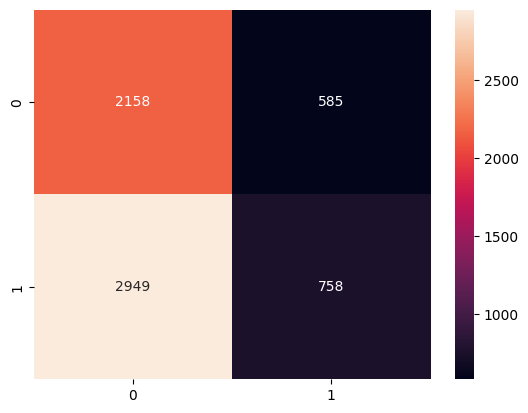

In [ ]:
# CON COLORES MATRIX - Parece que el error aca de los numeros es por que el modelo predijo 3 clases en vez de 2 toca correrlo de nuevo
sns_matrix_app = sns.heatmap(confusion_matrix_Appraisal, annot= True, fmt='g')

In [ ]:
sns_matrix_app.figure.savefig("Conf_mat_App_BART_ZSC.png")

### Evaluation Multiclass Attitude Classification

In [ ]:
# Extracting gold labels from data-subset of 10 speeches
gold_lables_attitude= []
for i in range(predicted_BARt_data.shape[0]):
  gold_lables_attitude.append(predicted_BARt_data.iloc[i]["Label"])

In [ ]:
predicted_Attitude_labels = predicted_BARt_data['Predicted Attitude BART-ZSC'].to_list()

In [ ]:
predicted_BARt_data['Predicted Attitude BART-ZSC'].value_counts()

affect-negative          1296
appreciation-positive     429
judgement-negative        394
appreciation-negative     320
affect-positive           233
judgement-positive         71
Name: Predicted Attitude BART-ZSC, dtype: int64

In [ ]:
# Calculating accuracy-
accuracy_attitude = accuracy_score(predicted_Attitude_labels, gold_lables_attitude)
print("Accuracy score: {:.2f}".format(accuracy_attitude*100))

Accuracy score: 15.49


In [ ]:
# Classification Report - INTERPRET THIS RESULTS
# y_true, y_pred, labels= xxx
print(classification_report(gold_lables_attitude, predicted_Attitude_labels))

                       precision    recall  f1-score   support

      affect-negative       0.06      0.46      0.11       183
      affect-positive       0.15      0.10      0.12       354
appreciation-negative       0.13      0.07      0.09       607
appreciation-positive       0.11      0.44      0.18       109
   judgement-negative       0.53      0.16      0.24      1308
   judgement-positive       0.13      0.05      0.07       182

             accuracy                           0.15      2743
            macro avg       0.18      0.21      0.14      2743
         weighted avg       0.32      0.15      0.17      2743



In [ ]:
# Confusion Matrix
# y_true, y_pred, labels= xxx
confusion_matrix_Attitude = confusion_matrix(gold_lables_attitude, predicted_Attitude_labels, labels=attitude_labels)

In [ ]:
confusion_matrix_Attitude

array([[ 34,  30, 239,   1,  42,   8],
       [  1,  84,   2,  17,   1,  78],
       [ 25,  22,  48,   3,   5,   6],
       [ 30, 408,  37,  42,   8,  82],
       [ 40,  51,  65,   5,   9,  12],
       [103, 701,  38, 252,   6, 208]])

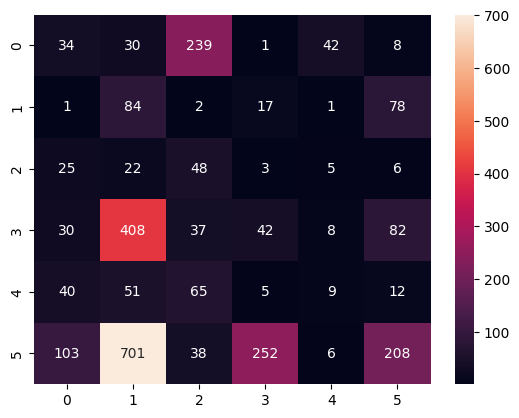

In [ ]:
# CON COLORES MATRIX - Parece que el error aca de los numeros es por que el modelo predijo 3 clases en vez de 2 toca correrlo de nuevo
sns_matrix_att = sns.heatmap(confusion_matrix_Attitude, annot= True, fmt='g')

In [ ]:
sns_matrix_att.figure.savefig("Conf_mat_Attitude_BART_ZSC.png")